# Implementation of Classification Algorithms

### Importing all the Necessary packages


In [12]:
# libraries Imported
# data analysis and wrangling
#from google.colab import files
import pandas as pd
from datetime import datetime
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#import xgboost as xgb
from sklearn import tree


### Importing and oberserving the dataset


In [13]:
netflix_ds = pd.read_csv("Netflix_movies_and_tv_shows_clustering.csv")
netflix_ds.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Heat Map

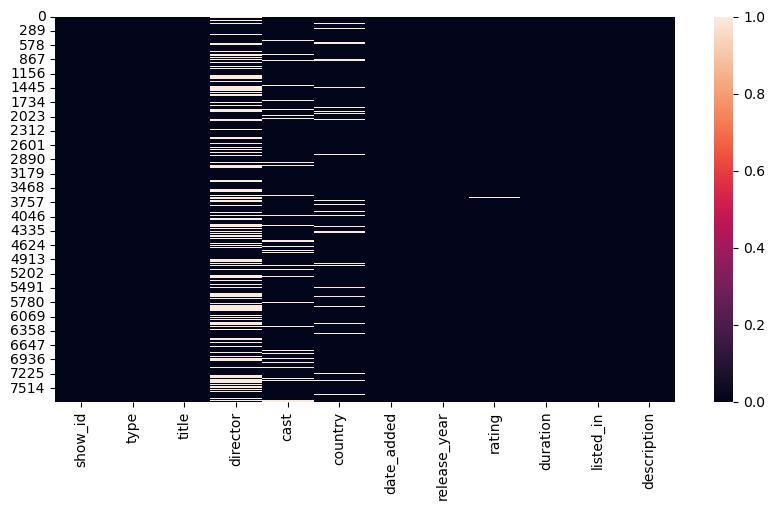

director's null rate :30.68%
cast's null rate :9.22%
country's null rate :6.51%
date_added's null rate :0.13%
rating's null rate :0.09%


In [14]:
plt.figure(figsize=(10, 5))
sns.heatmap(netflix_ds.isnull())
plt.show()

for i in netflix_ds.columns:
    null_rate = netflix_ds[i].isna().sum() / len(netflix_ds) * 100
    if null_rate > 0:
        print("{}'s null rate :{}%".format(i, round(null_rate, 2)))


#### Conversion of a type column into numerical data

In [15]:
title_mapping = {"TV Show": 1, "Movie": 0}
netflix_ds["type"] = netflix_ds["type"].map(title_mapping)
netflix_ds.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,1,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,0,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,0,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


#### Conversion of a Duration into numerical data

In [16]:
netflix_ds["duration"] = netflix_ds.duration.str.extract("([0-9]+)", expand=False)
netflix_ds["duration"] = pd.to_numeric(netflix_ds["duration"])
netflix_ds.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,1,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,0,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,0,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,A brilliant group of students become card-coun...


#### conversion of a rating column into numerical data

In [17]:
netflix_ds["rating"] = netflix_ds["rating"].astype(str)
r = {
    "TV-MA": 1,
    "R": 2,
    "PG-13": 3,
    "TV-14": 4,
    "TV-PG": 5,
    "NR": 6,
    "TV-G": 7,
    "TV-Y": 8,
    "TV-Y7": 9,
    "PG": 10,
    "G": 11,
    "NC-17": 12,
    "TV-Y7-FV": 13,
    "UR": 14,
}
netflix_ds["rating"] = netflix_ds["rating"].map(r)
netflix_ds["rating"] = netflix_ds["rating"].fillna(1)
netflix_ds["rating"] = netflix_ds["rating"].astype(int)
netflix_ds.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,1,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,1,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,1,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,2,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,0,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,3,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,0,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,3,123,Dramas,A brilliant group of students become card-coun...


#### Conversion of a Show Id into numerical data

In [18]:
netflix_ds["show_id"] = netflix_ds.show_id.str.extract("([0-9]+)", expand=False)
netflix_ds["show_id"] = pd.to_numeric(netflix_ds["show_id"])
netflix_ds.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,1,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,1,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,2,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,1,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,3,0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,2,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,4,0,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,3,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,5,0,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,3,123,Dramas,A brilliant group of students become card-coun...


#### Conversion of a date added into numerical data

In [19]:
netflix_ds["date_added"] = pd.to_datetime(netflix_ds["date_added"], errors="coerce")
dateTimeObj = datetime.now()
netflix_ds["date_added"] = pd.DatetimeIndex(netflix_ds["date_added"]).year
df = netflix_ds["date_added"].value_counts().idxmax()
print(netflix_ds.date_added.describe())
netflix_ds["date_added"] = netflix_ds["date_added"].fillna(2019)
netflix_ds["date_added"] = netflix_ds["date_added"].astype(int)
netflix_ds.head()

count    7689.000000
mean     2018.507218
std         1.382205
min      2008.000000
25%      2018.000000
50%      2019.000000
75%      2020.000000
max      2021.000000
Name: date_added, dtype: float64


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,1,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,2020,1,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,2,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,2016,1,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,3,0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018,2011,2,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,4,0,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017,2009,3,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,5,0,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020,2008,3,123,Dramas,A brilliant group of students become card-coun...


#### Extraction of genre added from Listed in column

In [20]:
netflix_ds["genre"] = netflix_ds.listed_in.str.extract(
    r"(Horror|Action & Adventure|Sci-Fi & Fantasy|Romantic|Comedies|Dramas|Sports|Trillers|Classic|cult|Children & Family|Science & Nature|Music)",
    expand=False,
)
g = {
    "Horror": 1,
    "Action & Adventure": 2,
    "Sci-Fi & Fantasy": 3,
    "Romantic": 4,
    "Comedies": 5,
    "Dramas": 6,
    "Sports": 7,
    "Trillers": 8,
    "Classic": 9,
    "cult": 10,
    "Children & Family": 11,
    "Science & Nature": 12,
}
# Extraction of genre added into numerical data
netflix_ds["genre"] = netflix_ds["genre"].map(g)
netflix_ds["genre"] = netflix_ds["genre"].fillna(0)
netflix_ds["genre"] = netflix_ds["genre"].astype(int)
pd.crosstab(netflix_ds["genre"], netflix_ds["type"])
netflix_ds[["genre", "type"]].groupby(["genre"], as_index=False).mean().sort_values(
    by="type", ascending=False
)


,genre,type
10,12,1.000000
4,4,0.922438
0,0,0.440243
5,5,0.270876
8,9,0.259615
6,6,0.245519
2,2,0.158693
3,3,0.125000
1,1,0.109155
7,7,0.000000


### Group Country in Continent
#### conversion of a country into numerical data

In [21]:
con = netflix_ds.country.unique()
asia = [
    "Russian",
    "China",
    "India",
    "Kazakhstan",
    "Saudi Arabia",
    "Iran",
    "Mongolia",
    "Indonesia",
    "Pakistan",
    "Turkey",
    "Myanmar",
    "Afghanistan",
    "Yemen",
    "Thailand",
    "Turkmenistan",
    "Uzbekistan",
    "Iraq",
    "Japan",
    "Vietnam",
    "Malaysia",
    "Oman",
    "Philippines",
    "Laos",
    "Kyrgyzstan",
    "Nepal",
    "Tajikistan",
    "North Korea",
    " South Korea",
    "Jordan",
    "Azerbaijan",
    "syria",
    "combodia",
    "Bangladash",
    "United Arab Emirates",
    "Georgia",
    "Sri Lanka",
    "Bhutan",
    "Taiwan",
    "Armenia",
    "Israel kuwait",
    "Timor-Leste",
    "Qatar",
    "Lebanon",
    "Cyprus",
    "Palestine",
    "Brunei",
    "Bahrain",
    "Singapore",
    "Maldives",
]
europe = [
    "Germany",
    "United Kingdom",
    "France",
    "Italy",
    "Spain",
    "Ukraine",
    "Poland",
    "Romania",
    "Netherlands",
    "Belgium",
    "Czech Republic",
    "Greece",
    "Portugal",
    "Sweden",
    "Hungary",
    "Belarus",
    "Austria",
    "Serbia",
    "Switzerland",
    "Bulgaria",
    "Denmark",
    "Finland",
    "Slovakia",
    "Norway",
    "Ireland",
    "Croatia",
    "Moldova",
    "Bosnia",
    "Albania",
    "Lithuania",
    "North Macedonia",
    "Slovenia",
    "Latvia",
    "Estonia",
    "Montenegro",
    "Luxembourg",
    "Malta",
    "Iceland",
    "ndorra",
    "Monaco",
    "Liechtenstein",
    "San Marino",
    "Holy See",
]
Africa = [
    "Ethiopia",
    "Nigeria",
    "Egypt",
    "DR Congo",
    "Tanzania",
    "South Africa",
    "Kenya",
    "Uganda",
    "Algeria",
    "Sudan",
    "Morocco",
    "Angola",
    "Mozambique",
    "Ghana",
    "Madagascar",
    "Cameroon",
    "Côte dIvoire",
    "Niger",
    "Burkina Faso",
    "Mali",
    "Malawi",
    "Zambia",
    "Senegal",
    "Chad",
    "Somalia",
    "Zimbabwe",
    "Guinea",
    "Rwanda",
    "Benin",
    "Burundi",
    "Tunisia",
    "South Sudan",
    "Togo",
    "Sierra Leone",
    "Libya",
    "Congo",
    "Liberia",
    "Central African Republic",
    "Mauritania",
    "Eritrea",
    "Namibia",
    "Gambia",
    "Botswana",
    "Gabon",
    "Lesotho",
    "Guinea-Bissau",
    "Equatorial Guinea",
    "Mauritius",
    "Eswatini",
    "Djibouti",
    "Co",
    "Cabo Verde",
    "Sao Tome",
    "Seychelles",
]
Australia = [
    "Micronesia",
    "Fiji",
    "Kiribati",
    "Marshall Islands",
    "Nauru",
    "New Zealand",
    "Palau",
    "Papua New Guinea",
    "Samoa",
    "Solomon Islands",
    "Tonga",
    "Tuvalu",
    "Vanuatu",
]
America = [
    "Anguilla",
    "United Kingdom",
    "Barbuda",
    "Argentina",
    "Aruba",
    "Netherlands",
    "Bahamas",
    "Barbados",
    "Belize",
    "Bermuda",
    "Bolivia",
    "Bonaire",
    "Norway",
    "Brazil",
    "British Virgin Islands",
    "Canada",
    "Cayman Islands",
    "Chile",
    "Clipperton Island",
    "Colombia",
    "Costa Rica",
    "Cuba",
    "Curaçao",
    "Dominica",
    "Dominican Republic",
    "Ecuador",
    "El Salvador",
    "Falkland Islands",
    "French Guiana",
    "Greenland",
    "Denmark",
    "Grenada",
    "Guadeloupe",
    "Guatemala",
    "Guyana",
    "Haiti",
    "Honduras",
    "Jamaica",
    "Martinique",
    "Mexico",
    "Montserrat",
    "Navassa Island",
    "United States",
    "Nicaragua",
    "Panama",
    "Paraguay",
    "Peru",
    "Puerto Rico",
    "Saba",
    "Saint Barthélemy",
    "Saint Kitts",
    "Saint Lucia",
    "Saint Martin",
    "Saint Pierre",
    "Saint Vincent",
    "Sint Eustatius",
    "Sint Maarten",
    "South Georgia",
    "South Sandwich Islands",
    "Suriname",
    "Trinidad",
    "Tobago",
    "Turks",
    "Caicos Islands",
    "Virgin Islands",
    "United States of America",
    "Uruguay",
    "Venezuela",
]
netflix_ds["continenta"] = netflix_ds.country.str.contains(
    r"(Russian|China|India|Kazakhstan|Saudi Arabia|Iran|Mongolia|Indonesia|Pakistan|Turkey|Myanmar|Afghanistan|Yemen|Thailand|Turkmenistan|Uzbekistan|Iraq|Japan|Vietnam|Malaysia|Oman|Philippines|Laos|Kyrgyzstan|Nepal|Tajikistan|North Korea|South Korea|Jordan|Azerbaijan|syria|combodia|Bangladash|United Arab Emirates|Georgia|Sri Lanka|Bhutan|Taiwan|Armenia|Israel|kuwait|Timor-Leste|Qatar|Lebanon|Cyprus|Palestine|Brunei|Bahrain|Singapore|Maldives)"
)
netflix_ds.loc[netflix_ds.continenta == True, "continenta"] = "Asia"
netflix_ds["continente"] = netflix_ds.country.str.contains(
    r"(Germany|United Kingdom|France|Italy|Spain|Ukraine|Poland|Romania|Netherlands|Belgium|Czech Republic|Greece|Portugal|Sweden|Hungary|Belarus|Austria|Serbia|Switzerland|Bulgaria|Denmark|Finland|Slovakia|Norway|Ireland|Croatia|Moldova|Bosnia|Albania|Lithuania|North Macedonia|Slovenia|Latvia|Estonia|Montenegro|Luxembourg|Malta|Iceland|ndorra|Monaco|Liechtenstein|San Marino|Holy See)"
)
netflix_ds.loc[netflix_ds.continente == True, "continente"] = "Europe"
netflix_ds["continentaf"] = netflix_ds.country.str.contains(
    r"(Ethiopia| Nigeria|Egypt|DR Congo|Tanzania|South Africa|Kenya|Uganda|Algeria|Sudan|Morocco|Angola|Mozambique|Ghana|Madagascar|Cameroon|Côte dIvoire|Niger|Burkina Faso|Mali|Malawi|Zambia|Senegal|Chad|Somalia|Zimbabwe|Guinea|Rwanda|Benin|Burundi|Tunisia|South Sudan|Togo|Sierra Leone|Libya|Congo|Liberia|Central African Republic|Mauritania|Eritrea|Namibia|Gambia|Botswana|Gabon|Lesotho|Guinea-Bissau|Equatorial Guinea|Mauritius|Eswatini|Djibouti|Co|Cabo Verde|Sao Tome|Seychelles)"
)
netflix_ds.loc[netflix_ds.continentaf == True, "continentaf"] = "Africa"
netflix_ds["continentau"] = netflix_ds.country.str.contains(
    r"(Micronesia| Fiji|Kiribati|Marshall Islands|Nauru|New Zealand|Palau|Papua New Guinea|Samoa|Solomon Islands|Tonga|Tuvalu|Vanuatu)"
)
netflix_ds.loc[netflix_ds.continentau == True, "continentau"] = "Australia"
netflix_ds["continentam"] = netflix_ds.country.str.contains(
    r"(Anguilla|United Kingdom|Barbuda|Argentina|Aruba|Netherlands|Bahamas|Barbados|Belize|Bermuda|Bolivia|Bonaire|Norway|Brazil|British Virgin Islands|Canada|Cayman Islands|Chile|Clipperton Island|Colombia|Costa Rica|Cuba|Curaçao|Dominica|Dominican Republic|Ecuador|El Salvador|Falkland Islands|French Guiana |Greenland|Denmark|Grenada|Guadeloupe|Guatemala|Guyana|Haiti|Honduras|Jamaica|Martinique|Mexico|Montserrat|Navassa Island|United States|Nicaragua|Panama|Paraguay|Peru|Puerto Rico|Saba|Saint Barthélemy|Saint Kitts|Saint Lucia|Saint Martin|Saint Pierre|Saint Vincent|Sint Eustatius|Sint Maarten| South Georgia|South Sandwich Islands|Suriname|Trinidad|Tobago|Turks|Caicos Islands|Virgin Islands|United States of America|Uruguay|Venezuela)"
)
netflix_ds.loc[netflix_ds.continentam == True, "continentam"] = "America"
# conversion of a rating column into numerical data
contin = {"Asia": 1, "Europe": 2, "Africa": 3, "Australia": 4, "America": 5}
netflix_ds["continenta"] = netflix_ds["continenta"].map(contin)
netflix_ds["continente"] = netflix_ds["continente"].map(contin)
netflix_ds["continentaf"] = netflix_ds["continentaf"].map(contin)
netflix_ds["continentau"] = netflix_ds["continentau"].map(contin)
netflix_ds["continentam"] = netflix_ds["continentam"].map(contin)
netflix_ds["continenta"] = netflix_ds["continenta"].fillna(0)
netflix_ds["continente"] = netflix_ds["continente"].fillna(0)
netflix_ds["continentaf"] = netflix_ds["continentaf"].fillna(0)
netflix_ds["continentau"] = netflix_ds["continentau"].fillna(0)
netflix_ds["continentam"] = netflix_ds["continentam"].fillna(0)
netflix_ds["continent"] = (
    netflix_ds["continenta"]
    + netflix_ds["continente"]
    + netflix_ds["continentaf"]
    + netflix_ds["continentau"]
    + netflix_ds["continentam"]
)
netflix_ds["continent"] = netflix_ds["continent"].astype(int)
netflix_ds.loc[(netflix_ds.continent > 5), "continent"] = 5
netflix_ds["continent"] = (
    netflix_ds["continenta"]
    + netflix_ds["continente"]
    + netflix_ds["continentaf"]
    + netflix_ds["continentau"]
    + netflix_ds["continentam"]
)
netflix_ds["continent"] = netflix_ds["continent"].astype(int)
netflix_ds.loc[(netflix_ds.continent > 5), "continent"] = 5
netflix_ds = netflix_ds.drop(
    ["continenta", "continente", "continentaf", "continentau", "continentam"], axis=1
)
netflix_ds.head(10)


C:\Users\D Phanindra\AppData\Local\Temp\ipykernel_10500\1551731819.py:239: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  netflix_ds["continenta"] = netflix_ds.country.str.contains(
C:\Users\D Phanindra\AppData\Local\Temp\ipykernel_10500\1551731819.py:243: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  netflix_ds["continente"] = netflix_ds.country.str.contains(
C:\Users\D Phanindra\AppData\Local\Temp\ipykernel_10500\1551731819.py:247: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  netflix_ds["continentaf"] = netflix_ds.country.str.contains(
C:\Users\D Phanindra\AppData\Local\Temp\ipykernel_10500\1551731819.py:251: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre,continent
0,1,1,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,2020,1,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,6,5
1,2,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,2016,1,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,6,5
2,3,0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018,2011,2,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",1,1
3,4,0,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017,2009,3,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2,5
4,5,0,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020,2008,3,123,Dramas,A brilliant group of students become card-coun...,6,5
5,6,1,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017,2016,1,1,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,6,1
6,7,0,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020,2019,1,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",1,3
7,8,0,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019,1997,2,119,Dramas,After one of his high school students attacks ...,6,5
8,9,0,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019,2019,4,118,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",1,1
9,10,0,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017,2008,1,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,1,1


In [22]:
netflix_ds = netflix_ds.drop(
    ["title", "country", "cast", "director", "listed_in", "description"], axis=1
)
# After complete conversion into numerical data
netflix_ds.head()


,show_id,type,date_added,release_year,rating,duration,genre,continent
0,1,1,2020,2020,1,4,6,5
1,2,0,2016,2016,1,93,6,5
2,3,0,2018,2011,2,78,1,1
3,4,0,2017,2009,3,80,2,5
4,5,0,2020,2008,3,123,6,5


### Divide data into train and test
#### model Data:

In [23]:
feature_cols = ["continent", "date_added", "release_year", "genre", "duration", "type"]
X = netflix_ds[feature_cols]  # Features
y = netflix_ds.rating  # Target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)  # Logistic Regression
# X_train.shape, y_train.shape, X_test.shape


### KNN algorithm:

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 3)
print(acc_knn)


64.041


In [25]:
print(classification_report(y_test, Y_pred))


              precision    recall  f1-score   support

           1       0.48      0.69      0.56       697
           2       0.38      0.34      0.36       175
           3       0.33      0.17      0.22       106
           4       0.42      0.37      0.40       504
           5       0.33      0.20      0.25       192
           6       0.00      0.00      0.00        19
           7       0.12      0.04      0.06        52
           8       0.39      0.21      0.28        70
           9       0.33      0.25      0.29        67
          10       0.51      0.44      0.48        54
          11       0.50      0.12      0.20         8
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1

    accuracy                           0.43      1947
   macro avg       0.27      0.20      0.22      1947
weighted avg       0.41      0.43      0.41      1947



C:\Users\D Phanindra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D Phanindra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D Phanindra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree

In [26]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
Y_pred = dt.predict(X_test)
acc_dt = round(dt.score(X_train, y_train) * 100, 3)
print(acc_dt)

88.476


In [28]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.50      0.56      0.53       697
           2       0.42      0.39      0.41       175
           3       0.40      0.29      0.34       106
           4       0.44      0.40      0.42       504
           5       0.23      0.22      0.23       192
           6       0.04      0.05      0.04        19
           7       0.23      0.17      0.20        52
           8       0.29      0.26      0.27        70
           9       0.24      0.25      0.24        67
          10       0.26      0.35      0.30        54
          11       0.30      0.38      0.33         8
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1

    accuracy                           0.41      1947
   macro avg       0.24      0.24      0.24      1947
weighted avg       0.41      0.41      0.41      1947



### Naive Bayes algorithm:

In [29]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 3)
print(acc_gaussian)

20.086


In [30]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.44      0.40      0.42       697
           2       0.00      0.00      0.00       175
           3       0.18      0.18      0.18       106
           4       0.61      0.12      0.21       504
           5       0.00      0.00      0.00       192
           6       0.00      0.00      0.00        19
           7       0.00      0.00      0.00        52
           8       0.04      0.01      0.02        70
           9       0.12      0.01      0.03        67
          10       0.01      0.02      0.01        54
          11       0.01      1.00      0.02         8
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1

    accuracy                           0.19      1947
   macro avg       0.10      0.13      0.06      1947
weighted avg       0.33      0.19      0.22      1947



C:\Users\D Phanindra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D Phanindra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D Phanindra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## model Evaluation

In [31]:
models = pd.DataFrame(
    {"Model": ["Decision Tree","KNN", "Naive Bayes"], "Score": [acc_dt, acc_knn,acc_gaussian]}
)
models.sort_values(by="Score", ascending=False)

,Model,Score
0,Decision Tree,88.476
1,KNN,64.041
2,Naive Bayes,20.086


In [32]:
Y_pred

array([11,  1, 11, ..., 11, 11,  1])

In [33]:
netflix_ds

,show_id,type,date_added,release_year,rating,duration,genre,continent
0,1,1,2020,2020,1,4,6,5
1,2,0,2016,2016,1,93,6,5
2,3,0,2018,2011,2,78,1,1
3,4,0,2017,2009,3,80,2,5
4,5,0,2020,2008,3,123,6,5
...,...,...,...,...,...,...,...,...
7782,7783,0,2020,2005,1,99,6,5
7783,7784,0,2019,2015,4,111,6,1
7784,7785,0,2020,2019,1,44,0,0
7785,7786,1,2020,2019,5,1,0,0
